<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Context" data-toc-modified-id="Context-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Context</a></span><ul class="toc-item"><li><span><a href="#Data-source" data-toc-modified-id="Data-source-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data source</a></span></li></ul></li><li><span><a href="#Library" data-toc-modified-id="Library-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Library</a></span></li><li><span><a href="#Load-map-data" data-toc-modified-id="Load-map-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load map data</a></span><ul class="toc-item"><li><span><a href="#Convert-to-geojson-format" data-toc-modified-id="Convert-to-geojson-format-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Convert to geojson format</a></span></li></ul></li><li><span><a href="#HDB-population" data-toc-modified-id="HDB-population-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>HDB population</a></span><ul class="toc-item"><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data cleaning</a></span></li><li><span><a href="#Visualise-data" data-toc-modified-id="Visualise-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Visualise data</a></span></li><li><span><a href="#Map-Plotting" data-toc-modified-id="Map-Plotting-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Map Plotting</a></span></li></ul></li><li><span><a href="#General-Singapore-population" data-toc-modified-id="General-Singapore-population-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>General Singapore population</a></span><ul class="toc-item"><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Data cleaning</a></span></li><li><span><a href="#Visualise-data" data-toc-modified-id="Visualise-data-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Visualise data</a></span></li><li><span><a href="#Map-Plotting" data-toc-modified-id="Map-Plotting-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Map Plotting</a></span></li></ul></li><li><span><a href="#Concluding-remarks" data-toc-modified-id="Concluding-remarks-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Concluding remarks</a></span></li></ul></div>

# Context

Recently population growth is on trend again. I was curious how have our population figures change over the years. To quench my curiosity, I plot the Singapore population data by different planning areas in Singapore.

I used Urban Redevelopment Authority (URA)'s planning area boundary to divide Singapore into different regions.\
I used two different datasets from data.gov.sg and singstat. One contains HDB population data while the other contains all the Singapore resident figures.

I used plotly choropleth maps to have a visual and interactive understanding of the changes in population.

## Data source

HDB population data: https://data.gov.sg/dataset/estimated-resident-population-living-in-hdb-flats \
Singapore Residents by Planning Area: https://www.singstat.gov.sg/find-data/search-by-theme/population/geographic-distribution/latest-data \
planning area: https://data.gov.sg/dataset/master-plan-2019-planning-area-boundary-no-sea

# Library

In [1]:
#geo data
import geopandas as gpd
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

#standard data
import pandas as pd
import numpy as np
import json

#plotting
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
PATH = 'master-plan-2019-planning-area-boundary-no-sea/'

# Load map data

We will be using the Keyhole Markup Language (KML) file from URA.

Here is the description taken from Data.gov.sg

```
Indicative polygon of planning area boundary.

To facilitate urban planning, the Urban Redevelopment Authority (URA) divides Singapore into regions, planning areas and subzones.

The Planning Regions are divided into smaller Planning Areas. Each Planning Area have a population of about 150,000 and served by a town centre and several neighbourhood commercial/shopping centres.
```

Here is a description of what KML files are

```
Keyhole Markup Language is an XML notation for expressing geographic annotation and visualization within two-dimensional maps and three-dimensional Earth browsers. KML was developed for use with Google Earth, which was originally named Keyhole Earth Viewer. - wikipedia
```

Another population data format to store map data is GEOJSON
```
GeoJSON is an open standard format designed for representing simple geographical features, along with their non-spatial attributes. It is based on the JavaScript Object Notation. The features include points, line strings, polygons, and multi-part collections of these types. - wikipedia
```

KML and GEOJSON files are commonly used in spatial analysis. However, plotly only supports GEOJSON files. We will later convert the KML files into GEOJSON format.

In [3]:
sg_map = gpd.read_file(PATH+'planning-boundary-area.kml') #load file

In [4]:
sg_map.head()

,Name,Description,geometry
0,kml_1,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.81740 1.29433 0.00000, 103.817..."
1,kml_2,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.77445 1.39029 0.00000, 103.774..."
2,kml_3,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.79766 1.34813 0.00000, 103.798..."
3,kml_4,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.80578 1.41436 0.00000, 103.805..."
4,kml_5,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.98693 1.39794 0.00000, 103.987..."


The original dataset taken from URA contains three columns

***Name*** is the identification key used to identify the area\
***Description*** contains some details about the area\
***geometry*** contains polygon (a shape object) which contains the coordinates of the area

In [5]:
sg_map.loc[0,'Description']

'<center><table><tr><th colspan=\'2\' align=\'center\'><em>Attributes</em></th></tr><tr bgcolor="#E3E3F3"> <th>PLN_AREA_N</th> <td>BUKIT MERAH</td> </tr><tr bgcolor=""> <th>PLN_AREA_C</th> <td>BM</td> </tr><tr bgcolor="#E3E3F3"> <th>CA_IND</th> <td>N</td> </tr><tr bgcolor=""> <th>REGION_N</th> <td>CENTRAL REGION</td> </tr><tr bgcolor="#E3E3F3"> <th>REGION_C</th> <td>CR</td> </tr><tr bgcolor=""> <th>INC_CRC</th> <td>5321BA51A092CCC2</td> </tr><tr bgcolor="#E3E3F3"> <th>FMEL_UPD_D</th> <td>20191206144714</td> </tr></table></center>'

***Description*** contains the information we want: the name of the area. We will use Regular expression (regex) to extract the information we need.

We will store the name of the area as ***Name*** in the map file\
We will drop ***Description*** since we do not want other data from it

In [6]:
sg_map['Name'] = sg_map['Description'].str.extract('(?:.*?<td>(.*?)</td>)')

In [7]:
sg_map = sg_map.drop('Description', axis=1)

We do a simple plot here to see that indeed our map contains information about Singapore

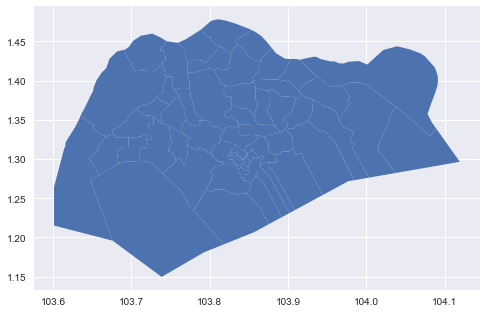

In [8]:
sg_map.plot();

In [9]:
sg_map.head()

,Name,geometry
0,BUKIT MERAH,"POLYGON Z ((103.81740 1.29433 0.00000, 103.817..."
1,BUKIT PANJANG,"POLYGON Z ((103.77445 1.39029 0.00000, 103.774..."
2,BUKIT TIMAH,"POLYGON Z ((103.79766 1.34813 0.00000, 103.798..."
3,CENTRAL WATER CATCHMENT,"POLYGON Z ((103.80578 1.41436 0.00000, 103.805..."
4,CHANGI,"POLYGON Z ((103.98693 1.39794 0.00000, 103.987..."


We have a nicely formatted df for our map plotting later

## Convert to geojson format

As I've explained earlier, plotly only supports GEOJSON at this point. Therefore, we'll convert the df into a GEOJSON format file.

In [10]:
sg_map_json = json.loads(sg_map.to_json())

# HDB population

We load the Estimated Singapore Resident Population in HDB Flats data from Data.gov.sg here.

```
Data on Singapore resident population in HDB flats are estimated figures and include residents living in sold and rental flats.

Singapore resident population refers to Singapore Citizens and Permanent Residents only.
```

We use this data to have a better understanding of how Singaporeans and PRs population who lived in HDB have change over the years.

This file contains HDB population figure from **2008 to 2018**.

In [11]:
HDB_pop = pd.read_csv(PATH+'estimated-resident-population-in-hdb-flats-by-town.csv')

## Data cleaning

In [12]:
HDB_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   financial_year  295 non-null    int64 
 1   town_or_estate  295 non-null    object
 2   population      295 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.0+ KB


There is a suddent drop in population, clearly something is wrong with this dataset

In [13]:
HDB_pop.groupby('financial_year')['population'].sum()

financial_year
2008    6040200
2009    6188200
2010    6251800
2011    6313800
2012    6331800
2013    6426000
2014    6434800
2015    6469600
2016    6499800
2017    3247500
2018    3238400
Name: population, dtype: int64

After some data exploration, we realised that from 2008 to 2016 there is a subtotal row in ***town_or_estate named*** TOTAL -.-

In [14]:
HDB_pop['town_or_estate'].unique()

array(['Ang Mo Kio', 'Bedok', 'Bishan', 'Bukit Batok', 'Bukit Merah',
       'Bukit Panjang', 'Bukit Timah', 'Choa Chu Kang', 'Central Area',
       'Clementi', 'Geylang', 'Hougang', 'Jurong East', 'Jurong West',
       'Kallang/Whampoa', 'Marine Parade', 'Pasir Ris', 'Punggol',
       'Queenstown', 'Sembawang', 'Sengkang', 'Serangoon', 'Tampines',
       'Toa Payoh', 'Woodlands', 'Yishun', 'Total'], dtype=object)

In [15]:
HDB_pop[HDB_pop['town_or_estate'] == 'Total'].sort_values(by='financial_year')

,financial_year,town_or_estate,population
26,2008,Total,3020100
53,2009,Total,3094100
80,2010,Total,3125900
107,2011,Total,3156900
134,2012,Total,3165900
161,2013,Total,3213000
188,2014,Total,3217400
215,2015,Total,3234800
242,2016,Total,3249900


Let's remove the row with TOTAL

In [16]:
HDB_pop = HDB_pop[HDB_pop['town_or_estate'] != 'Total']

Since our objective is to plot these data points, we need to make sure the area name is the same for both df and map df

In [17]:
HDB_pop = HDB_pop.assign(town_or_estate = HDB_pop['town_or_estate'].str.upper()) #capitalise all the names

We see that CENTRAL AREA and KALLANG/WHAMPOA are names that doesn't appear in the map

In [18]:
HDB_pop['town_or_estate'][~HDB_pop['town_or_estate'].isin(sg_map['Name'])].unique()

array(['CENTRAL AREA', 'KALLANG/WHAMPOA'], dtype=object)

Let's rename the two area into something that does appear in the map

In [19]:
HDB_pop = HDB_pop.assign(town_or_estate = np.where(HDB_pop['town_or_estate']=='KALLANG/WHAMPOA', 
                                                            'KALLANG', HDB_pop['town_or_estate']))

In [20]:
HDB_pop = HDB_pop.assign(town_or_estate = np.where(HDB_pop['town_or_estate']=='CENTRAL AREA', 
                                                            'DOWNTOWN CORE', HDB_pop['town_or_estate']))

In [21]:
HDB_pop['town_or_estate'][~HDB_pop['town_or_estate'].isin(sg_map['Name'])].unique()

array([], dtype=object)

Now we are sure that every single town and estate will be reflected in our map

In [22]:
sg_map['Name'][~sg_map['Name'].isin(HDB_pop['town_or_estate'])].unique()

array(['CENTRAL WATER CATCHMENT', 'CHANGI', 'LIM CHU KANG', 'MANDAI',
       'NORTH-EASTERN ISLANDS', 'NOVENA', 'PIONEER', 'BOON LAY',
       'SELETAR', 'SIMPANG', 'SOUTHERN ISLANDS', 'SUNGEI KADUT',
       'TANGLIN', 'TENGAH', 'TUAS', 'MARINA EAST', 'MARINA SOUTH',
       'MUSEUM', 'NEWTON', 'ORCHARD', 'OUTRAM', 'RIVER VALLEY', 'ROCHOR',
       'SINGAPORE RIVER', 'STRAITS VIEW', 'CHANGI BAY', 'PAYA LEBAR',
       'WESTERN ISLANDS', 'WESTERN WATER CATCHMENT'], dtype=object)

We note that not every area in the map has HDB population record.\
Some of these areas are expected, for example: Singapore River, Central water catchment, where there is no residents there.\
But some of the areas are unexpected, for example: Boon Lay, Pioneer. This might have to do with the difference in how data classify each area.

## Visualise data

We find some interesting observations:

Growth rate for Singapore residents in HDB decreases from 2009 to 2018.\
There is a negative growth rate from 2016 to 2018.\
There is a sudden spike in growth rate in 2013.

percentage change of HDB population, compared to previous year


financial_year
2008         NaN
2009    2.450250
2010    1.027763
2011    0.991714
2012    0.285090
2013    1.487729
2014    0.136944
2015    0.540809
2016    0.466799
2017   -0.073848
2018   -0.280216
Name: population, dtype: float64

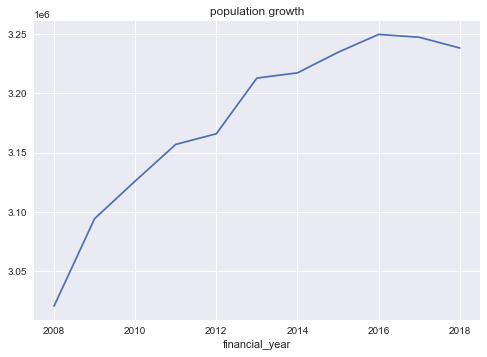

In [23]:
HDB_pop.groupby('financial_year')['population'].sum().plot(x='financial_year', y='population',
                                                          title='population growth')

print('percentage change of HDB population, compared to previous year')
HDB_pop.groupby('financial_year')['population'].sum().pct_change()*100

In [24]:
HDB_pop

,financial_year,town_or_estate,population
0,2008,ANG MO KIO,148200
1,2008,BEDOK,197900
2,2008,BISHAN,66500
3,2008,BUKIT BATOK,109100
4,2008,BUKIT MERAH,140600
...,...,...,...
290,2018,SERANGOON,68000
291,2018,TAMPINES,231800
292,2018,TOA PAYOH,104200
293,2018,WOODLANDS,242800


In [25]:
fig = plt.figure(figsize=[30,30])
gs = fig.add_gridspec(6, 5, wspace=0.3, hspace=0.3)
axes = {}
for i in range(6):
    for j in range(5):
        axes['{}{}'.format(i, j)] = fig.add_subplot(gs[i,j])
plt.close()

for ax, town in zip(axes.values(), HDB_pop['town_or_estate'].unique()):
    ax.plot('financial_year', 'population', label=town, 
             data=HDB_pop[HDB_pop['town_or_estate'] == town])
    ax.set_title(town)
fig.suptitle('HDB population growth by Town/Estate', fontsize=40, verticalalignment='bottom', y=0.9)

fig.delaxes(axes['51'])
fig.delaxes(axes['52'])
fig.delaxes(axes['53'])
fig.delaxes(axes['54'])

In [26]:
fig.savefig('output/HDB_pop.png')

![General Singapore resident population growth by Planning Area](https://raw.githubusercontent.com/lingjie00/Singapore-population-map/master/output/HDB_pop.png)

## Map Plotting

In [27]:
HDB_fig = px.choropleth_mapbox(HDB_pop, geojson=sg_map_json,
                               locations='town_or_estate', featureidkey='properties.Name', 
                               color='population', color_continuous_scale='Tealgrn',
                               animation_frame='financial_year', range_color=[8200,260600],
                               mapbox_style='open-street-map',
                               center = dict(lon = 103.8198,lat = 1.3521), opacity=0.5,
                               zoom=10, title='HDB Singapore resident population')
HDB_fig.write_html('output/HDB_fig.html') #export figure

In [28]:
#
# uncomment this to visualise map
#

# HDB_fig.update_geos(fitbounds="locations", visible=False)
# HDB_fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# HDB_fig.show()

[HDB Singapore resident population map view](https://lingjie00.github.io/Singapore-population-map/output/HDB_fig.html)

# General Singapore population

We load the data for Singapore Residents by Planning Area/Subzone, Age Group, Sex and Type of Dwelling from Singstat.

Here are some notes about the data

```
1) For June 2011 to 2019, Planning Areas refer to areas demarcated in the Urban Redevelopment Authority's Master Plan 2014.
2) Data from 2003 onwards exclude residents who have been away from Singapore for a continuous period of 12 months or longer as at the reference period.
3) The figures have been rounded to the nearest 10. 
4) The data may not add up due to rounding.
```

We use this data to understand the general trend of Singapore resident's population growth.

In [29]:
sg_pop = pd.read_csv(PATH+'/respopagesextod2011to2019.csv')

## Data cleaning

In [30]:
sg_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883728 entries, 0 to 883727
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   PA      883728 non-null  object
 1   SZ      883728 non-null  object
 2   AG      883728 non-null  object
 3   Sex     883728 non-null  object
 4   TOD     883728 non-null  object
 5   Pop     883728 non-null  int64 
 6   Time    883728 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 47.2+ MB


In [31]:
sg_pop['PA'] = sg_pop['PA'].str.upper() #capitalise area name

In [32]:
sg_pop['PA'][~sg_pop['PA'].isin(sg_map['Name'])].unique()

array([], dtype=object)

We have all the area name in our maps

In [33]:
sg_map['Name'][~sg_map['Name'].isin(sg_pop['PA'])].unique()

array([], dtype=object)

All the areas in map is in our general population df

In [34]:
sg_pop = sg_pop[['Time','PA','Pop']].groupby(['Time','PA'])['Pop'].sum().reset_index()

In [35]:
sg_pop.head()

,Time,PA,Pop
0,2011,ANG MO KIO,179150
1,2011,BEDOK,296020
2,2011,BISHAN,90960
3,2011,BOON LAY,0
4,2011,BUKIT BATOK,143550


## Visualise data

Every year the general Singapore resident population has been growing at a similar rate 

percentage change of Singapore resident population, compared to previous year


Time
2011         NaN
2012    0.789900
2013    0.671266
2014    0.673024
2015    0.859200
2016    0.801228
2017    0.834958
2018    0.701950
2019    0.807526
Name: Pop, dtype: float64

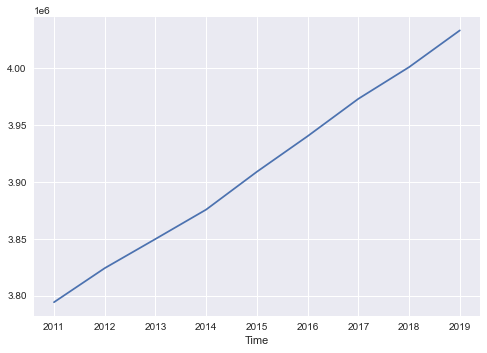

In [36]:
sg_pop.groupby('Time')['Pop'].sum().plot()

print('percentage change of Singapore resident population, compared to previous year')
sg_pop.groupby('Time')['Pop'].sum().pct_change()*100

In [37]:
fig = plt.figure(figsize=[30,60])
gs = fig.add_gridspec(11, 5, wspace=0.3, hspace=0.3)
axes = {}
for i in range(11):
    for j in range(5):
        axes['{}{}'.format(i, j)] = fig.add_subplot(gs[i,j])
plt.close()

for ax, town in zip(axes.values(), sg_pop['PA'].unique()):
    ax.plot('Time', 'Pop', label=town, 
             data=sg_pop[sg_pop['PA'] == town])
    ax.set_title(town)
    
fig.suptitle('General Singapore resident population growth by Planning Area', fontsize=40, 
             verticalalignment='bottom', y=0.9);

In [38]:
fig.savefig('output/sg_pop.png')

![General Singapore resident population growth by Planning Area](https://raw.githubusercontent.com/lingjie00/Singapore-population-map/master/output/sg_pop.png)

## Map Plotting

In [39]:
pop_fig = px.choropleth_mapbox(sg_pop, 
                               geojson=sg_map_json, locations='PA', featureidkey='properties.Name',
                               color='Pop', color_continuous_scale='Tealgrn',
                               range_color=[0, 30000],
                               animation_frame='Time', mapbox_style='open-street-map',
                               center = dict(lon = 103.8198,lat = 1.3521), opacity=0.5,
                               zoom=10, title='General Singapore resident population')
pop_fig.write_html('output/pop_fig.html') #export figure

In [40]:
#
# uncomment this to visualise map
#

# pop_fig.update_geos(fitbounds="locations", visible=False)
# pop_fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# pop_fig.show()

[General Singapore resident population map view](https://lingjie00.github.io/Singapore-population-map/output/pop_fig.html)

# Concluding remarks

As we have seen from the data, the population growth trend has been pretty consistent without any major changes.\
We are not sure if we will reach 10 million population one day but certainly this will not happen in the near future.\
There are some interesting observations in this data, some of the area experience a steady population growth while other areas might either see rapid growth or decrease in population.\
The data we have is limited in explaining the observations, but we propose that BTOs might be one of the reason for the spike increase.